### Comprendre & Tunner la Régression Logistique

In [1]:
### La Régression Logistique

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage plus joli
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

print("Notebook : Comprendre & tuner la régression logistique")


Notebook : Comprendre & tuner la régression logistique


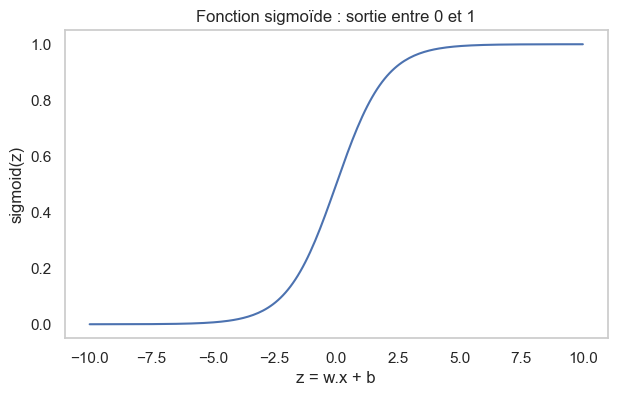


La régression logistique ne prédit PAS une classe, mais une PROBABILITÉ :

    p(y=1 | x) = σ(w.x + b)

Puis on applique un seuil (0.5 par défaut).



In [2]:

### 1. Pourquoi "logistique" ?


import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Fonction sigmoïde : sortie entre 0 et 1")
plt.xlabel("z = w.x + b")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

print("""
La régression logistique ne prédit PAS une classe, mais une PROBABILITÉ :

    p(y=1 | x) = σ(w.x + b)

Puis on applique un seuil (0.5 par défaut).
""")


In [3]:
# 2. JEU DE DONNÉES (breast cancer - sklearn)


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape :", X.shape)
print("Classes :", data.target_names)

X.head()


Shape : (569, 30)
Classes : ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 3. Train / Test + standardisation


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# 4. MODELE : LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

preds = model.predict(X_test_scaled)
proba = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy :", accuracy_score(y_test, preds))
print("\nConfusion matrix :\n", confusion_matrix(y_test, preds))
print("\nClassification report :\n", classification_report(y_test, preds))


Accuracy : 0.986013986013986

Confusion matrix :
 [[52  1]
 [ 1 89]]

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



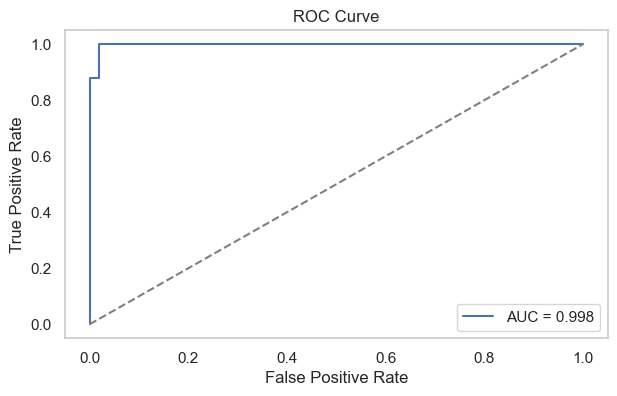

In [6]:
# 5. Courbe ROC & AUC


fpr, tpr, thresholds = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], "--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [7]:
# 6. COMMENT TUNER LA RÉGRESSION LOGISTIQUE ?

"""
Paramètres importants :
-----------------------
• penalty = "l1", "l2", "elasticnet"
• C       = force de régularisation (petit C = plus de régularisation)
• solver  = "liblinear", "saga", "lbfgs"
• class_weight = "balanced" pour contrer les classes déséquilibrées
"""

param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear"],
}

grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres :")
print(grid.best_params_)


Meilleurs hyperparamètres :
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [8]:
# 7. Evaluation du meilleur modèle

best_model = grid.best_estimator_
preds_best = best_model.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, preds_best))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, preds_best))
print("\nClassification Report:\n", classification_report(y_test, preds_best))


Accuracy : 0.986013986013986

Matrice de confusion :
 [[52  1]
 [ 1 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



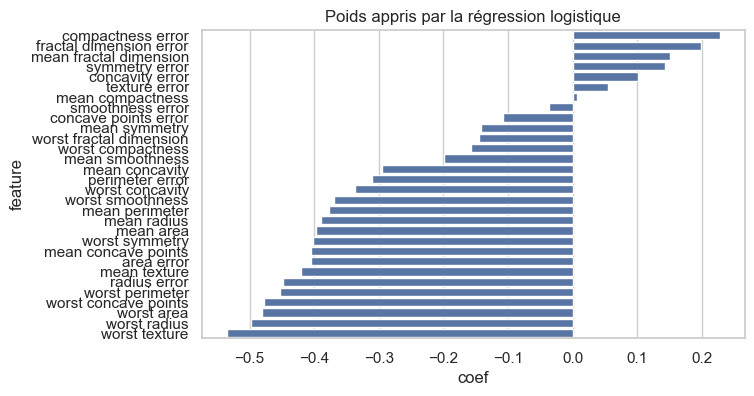

In [9]:
# 8. Importance des features (coefficients du modèle)


coef = best_model.coef_[0]
features = X.columns

df_coef = pd.DataFrame({
    "feature": features,
    "coef": coef
}).sort_values(by="coef", ascending=False)

sns.barplot(data=df_coef, x="coef", y="feature")
plt.title("Poids appris par la régression logistique")
plt.show()

1 Pourquoi utilise-t-on une sigmoïde dans la régression logistique ?
    → Explique en termes de probabilité.

2 Quelle différence entre :
       - prédiction de classes
       - prédiction de probas
    → Quand privilégier l’un ou l’autre ?

3 Teste plusieurs valeurs de C :
       C = 0.001, 0.1, 1, 10, 100
    → Observe l’accuracy et le F1-score.
    → Comment interprètes-tu l’effet de C ?

4 Change le solver :
       "lbfgs", "liblinear", "saga"
    → Lequel converge le plus rapidement ?

5 Teste penalty = "l1" (Lasso)
    → Quel effet sur les coefficients appris ?

6 Modifie le seuil de décision :
       seuil = 0.3, 0.5, 0.7
    → Impact sur la matrice de confusion ?
    → Quand préférer réduire le seuil ?

7 BONUS :
    Utilise class_weight="balanced" :
    → Pourquoi est-ce utile lorsque les classes sont déséquilibrées ?
